# **Imports and Load**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

# **Exploratory Analysis**

In [74]:
data = train_data
display(data)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


## Understanding the Data

**Basic Info:**
- id
- class (Target)
- does-bruise-or-bleed
- habitat
- season
- has-ring
- ring-type
- spore-print-color
- veil-type
- veil-color

**Cap Info :**
- cap-diameter
- cap-shape
- cap-surface
- cap-color

**Gill Info:**
- gill-attachment
- gill-spacing
- gill-color

**Stem Info:**
- stem-height
- stem-width
- stem-root
- stem-surface
- stem-color

## Class distribution in the dataset

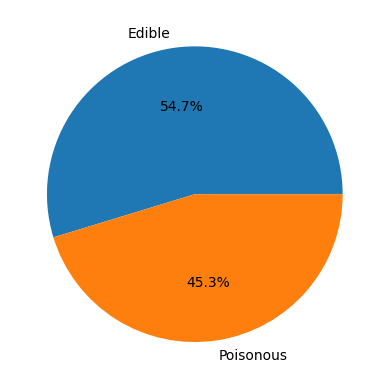

In [27]:
labels = 'Edible', 'Poisonous'
size = data['class'].value_counts()

fig, ax = plt.subplots()
ax.pie(size.values, labels=labels, autopct='%1.1f%%')
plt.show()

## Corruption Problem

In [75]:
display(data['does-bruise-or-bleed'].unique())

array(['f', 't', 'd', 'has-ring', 'w', 'o', 'b', 'x', 'p', nan, 'g', 'y',
       'r', 'a', 'l', 'i', 'c', 'n', 'z', 's', 'k', 'h', '3.43', 'e',
       '4.42', '2.9', 'u'], dtype=object)

In [77]:
from sklearn.preprocessing import LabelEncoder

def nominal_encode(data, column, values, withUnknown=True):
    le = LabelEncoder()
    t_data = data[column]
    le.fit(values)

    if withUnknown:
        t_data = t_data.map(lambda s: '<unknown>' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, '<unknown>')

    return le.transform(t_data)

In [78]:
encode_list = [
    ['cap-shape', ['b','c','x','f','k','s']],
    ['cap-surface', ['f','g','y','s']],
    ['cap-color', ['n','b','c','g','r','p','u','e','w','y']],
    ['does-bruise-or-bleed', ['t','f']],
    ['gill-attachment', ['a','d','f','n']],
    ['gill-spacing', ['c','w','d']],
    ['gill-color', ['k','n','b','h','g','r','o','p','u','e','w','y']]
]

for column, values in encode_list:
    data[column] = nominal_encode(
        data,
        column,
        values,
        True
    )

display(data)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,2,2,7,0,0,0,10,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,5,4,10,0,0,0,5,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,2,2,0,0,4,0,10,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,2,3,3,0,4,3,2,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,5,4,8,0,1,3,10,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,2,4,4,1,4,3,10,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,4,4,8,1,1,0,7,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,5,4,2,0,0,3,10,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,6,4,4,1,4,3,7,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


## Distribution of features

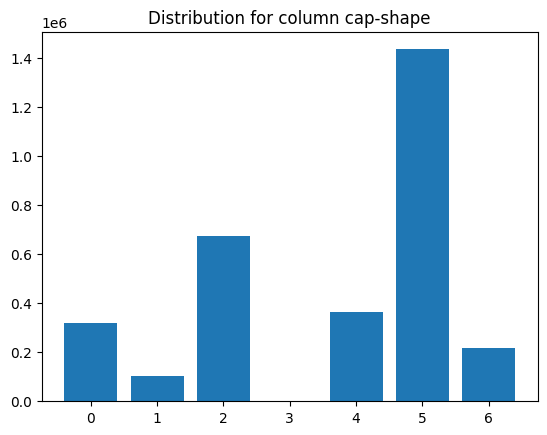

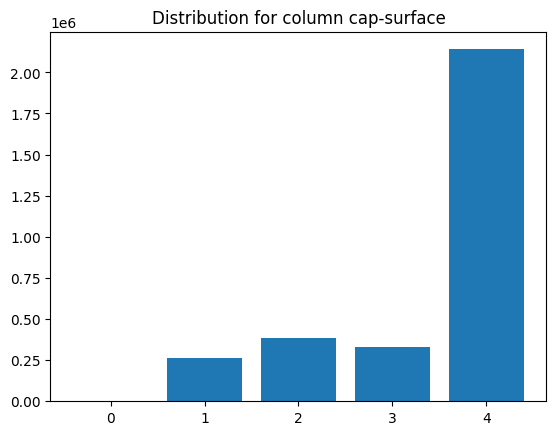

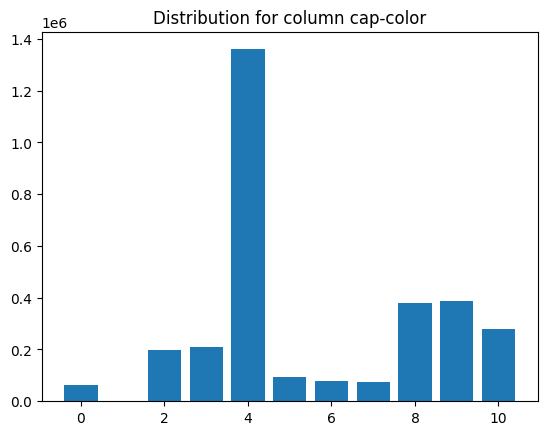

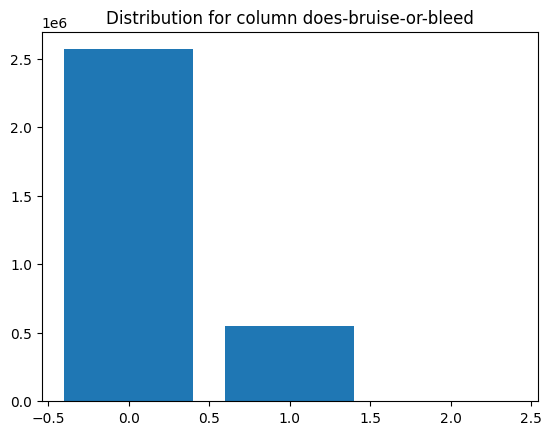

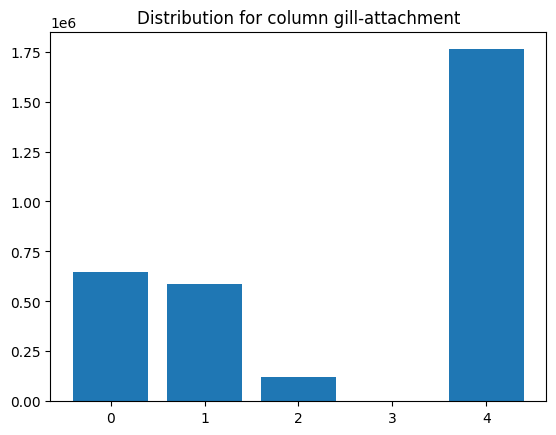

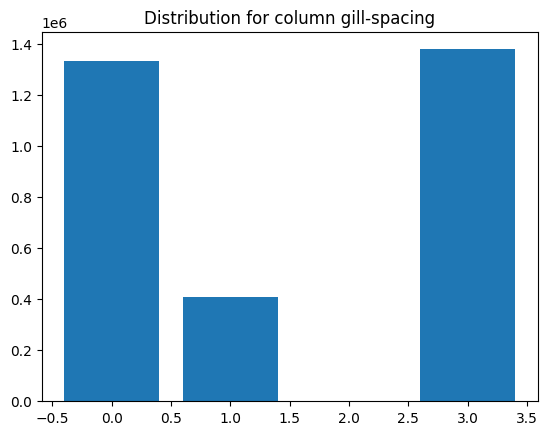

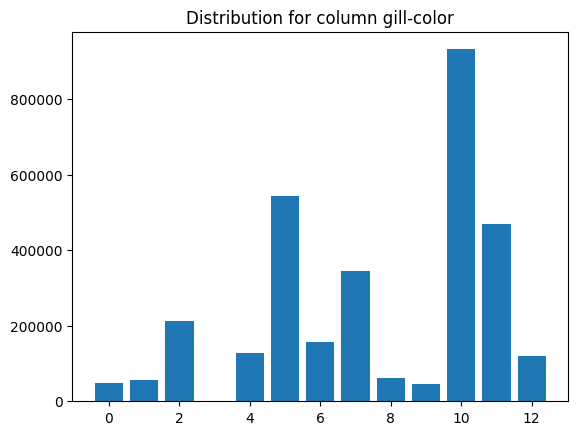

In [79]:
for column, values in encode_list:
    size = data[column].value_counts()

    fig, ax = plt.subplots()
    ax.bar(size.index, size.values)
    ax.set_title(f'Distribution for column {column}')
    plt.show()

- a lot of unknown values, low info to be obtained

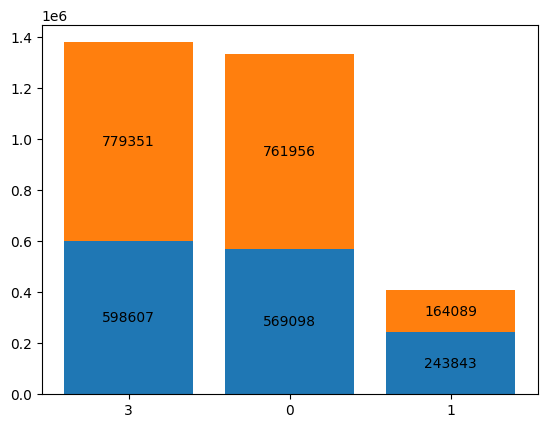

In [80]:
labels = 'Edible', 'Poisonous'
size = {
    'Edible': np.array(
        data[data['class'] == 'e']['gill-spacing'].value_counts().drop(2)
    ),
    'Poisonous': np.array(
        data[data['class'] == 'p']['gill-spacing'].value_counts()
    ),
}

fig, ax = plt.subplots()
bottom = np.zeros(3)
for type, count in size.items():
    p = ax.bar(['3', '0', '1'], count, label=type, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')
plt.show()

- Not much info to be obtained, class distribution is equal in feature

## Interval of Cap Diameter

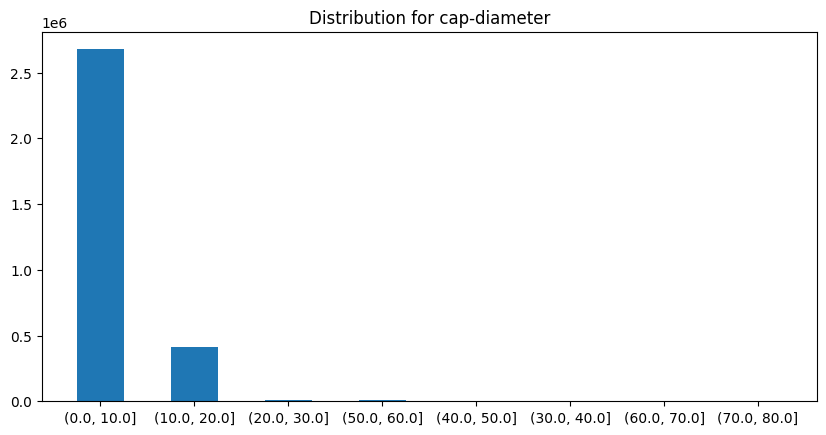

In [102]:
max_val = data['cap-diameter'].max()
size = pd.cut(data['cap-diameter'], np.arange(0, max_val, 10)).value_counts()

fig, ax = plt.subplots()
fig.set_figwidth(10)
ax.bar(size.index.astype(str), size.values, width=0.5)
ax.set_title(f'Distribution for cap-diameter')
plt.show()

## Drop List

- cap-surface
- gill-spacing

In [ ]:
data.drop(columns=['cap-surface','gill-spacing'])

# **Training a Classifier**

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(
    train_data.loc[:, train_data.columns != 'class'],
    train_data['class']
    )

reg.score(
    test_data.loc[:, test_data.columns != 'class'],
    test_data['class']
    )

ValueError: could not convert string to float: 'f'